## Import Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
import seaborn as sns
import numpy as np
import gdown

In [ ]:

file_id = '1T_NSpqYK25GUyBW6EJkUvIOfm0UCT8rS'
keynorm_file_id = '1F8ttS_6AGncjzO5KEp_g6hHb__ob9pYV'
slang_file_id = '13FOP8WB4tM0pSN1pcGo2cPan2nb0Jv5Y'

dwn_url_train = 'https://drive.google.com/uc?id=' + file_id
dwn_url_keynorm = 'https://drive.google.com/uc?id=' + keynorm_file_id
dwn_url_slang = 'https://drive.google.com/uc?id=' + slang_file_id

gdown.download(dwn_url_train, 'train.csv', quiet=False)
gdown.download(dwn_url_keynorm, 'keynorm.xlsx', quiet=False)
gdown.download(dwn_url_slang, 'slang.xlsx', quiet=False)

df = pd.read_csv('train.csv')
key_norm = pd.read_excel('keynorm.xlsx')
slang = pd.read_excel('slang.xlsx')


Downloading...
From: https://drive.google.com/uc?id=1T_NSpqYK25GUyBW6EJkUvIOfm0UCT8rS
To: /content/train.csv
100%|██████████| 1.05M/1.05M [00:00<00:00, 68.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1F8ttS_6AGncjzO5KEp_g6hHb__ob9pYV
To: /content/keynorm.xlsx
100%|██████████| 87.6k/87.6k [00:00<00:00, 68.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=13FOP8WB4tM0pSN1pcGo2cPan2nb0Jv5Y
To: /content/slang.xlsx
100%|██████████| 15.0k/15.0k [00:00<00:00, 29.0MB/s]


In [ ]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,79a415c4-399a-4f06-92b5-c2431e4de8cf,Hendrha Endha,https://play-lh.googleusercontent.com/a/ACg8oc...,Pokoknya torbaik,5,0,NaN,2024-07-23 08:14:05,Hi ka ..makasih ya untuk bintang 5 nya dan fee...,2024-07-23 09:13:17,NaN
1,85df6243-6a07-4457-9300-2b2758a8a20a,Kevinardhianputra 45,https://play-lh.googleusercontent.com/a-/ALV-U...,Good job,5,0,NaN,2024-07-23 08:12:30,Hallo kak. Makasih yaa kak buat review bintang...,2024-07-23 09:17:38,NaN
2,2361274b-127c-4a5b-809a-12723d6b9347,Muhammad Hasby,https://play-lh.googleusercontent.com/a/ACg8oc...,hujan koin tiap hari,5,0,3.30.28,2024-07-23 08:11:17,Hallo kak. Makasih yaa kak buat review bintang...,2024-07-23 09:27:20,3.30.28
3,e7bdc48d-3bf7-4036-a09e-a24d35071374,Rizki Saputra,https://play-lh.googleusercontent.com/a/ACg8oc...,Tolong dierbaiki masa mau c o barang gak bisa ...,1,0,NaN,2024-07-23 08:11:02,Hai kak. Mksh bnyk yaa buat bintangnya. Sebelu...,2024-07-23 09:36:35,NaN
4,9c292346-11a1-4c22-8a30-86ed66cd546d,Hana Wasidik,https://play-lh.googleusercontent.com/a-/ALV-U...,"Saya kurangi bintang nya,SPX sekarang agak lam...",4,0,3.30.28,2024-07-23 08:06:46,"Hallo kak, Mohon maaf ya kak udah bikin ga nya...",2024-07-23 09:36:21,3.30.28
...,...,...,...,...,...,...,...,...,...,...,...
1995,6e8e1aea-356c-465d-af31-24297b014de4,Novitasari Mpit,https://play-lh.googleusercontent.com/a/ACg8oc...,Masih banyak aja yg mau belnja disini heran pa...,1,0,3.29.24,2024-07-21 12:42:36,NaN,NaN,3.29.24
1996,c2f357fc-0e9f-4de0-bc02-c9aa628340f0,Nur Aidah,https://play-lh.googleusercontent.com/a/ACg8oc...,Kayaknya saya pindah belanja deh. Dulu sih ena...,1,0,3.29.24,2024-07-21 12:42:05,"Hai kak, maaf atas ketidaknyamanannya. Jika te...",2024-07-21 13:18:29,3.29.24
1997,22d708bf-4bfc-42b6-b1fe-0aeacd0d4e97,Imarda Imarda,https://play-lh.googleusercontent.com/a/ACg8oc...,"selalu puas dengan barang yang dibeli, kalaupu...",5,0,3.29.24,2024-07-21 12:41:35,"Hai kak, semoga selalu nyaman menggunakan Shop...",2024-07-21 13:12:31,3.29.24
1998,d8a43f97-ed20-4796-a524-e82eca2d065c,Rahman hakim,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aduh kacau kurir nya ga jujur, ya ga seberapa ...",1,1,NaN,2024-07-21 12:41:30,"Hai kak, maaf atas ketidaknyamanannya. Shopee ...",2024-07-21 13:23:27,NaN


## Preprocessing

In [ ]:
# Cleaning text: casefolding, menghapus emoji, hapus angka, and hapus whitespace
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

def remove_punc(text):
    return re.sub(r'[^\w\s]', ' ', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_extra_whitespace(text):
    return ' '.join(text.split())


df['clean_text'] = df['content'].str.lower()
df['clean_text'] = df['clean_text'].apply(lambda x: remove_pattern(x, r'[^\x00-\x7F]+'))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_punc(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_numbers(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_extra_whitespace(x))

In [ ]:
# Text normalization: mengubah menjadi bentuk baku, mengubah kata singkatan
def text_normalize(text):
    text = text.lower()
    words = text.split()
    normalized_words = []
    for word in words:
        if (key_norm['singkat'] == word).any():
            normalized_word = key_norm[key_norm['singkat'] == word]['hasil'].values
            if len(normalized_word) > 0 and isinstance(normalized_word[0], str):
                normalized_words.append(normalized_word[0])
            else:
                normalized_words.append(word)
        else:
            normalized_words.append(word)
    return ' '.join(normalized_words)

df['clean_text'] = df['clean_text'].apply(text_normalize)

def slangwords(text):
    text = ' '.join([slang[slang['Before'] == word]['After'].values[0] if (slang['Before'] == word).any() else word for word in text.split()])
    text = str.lower(text)
    return text

df['clean_text'] = df['clean_text'].apply(slangwords)

In [ ]:
# Stopword removal
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words_indonesian = set(stopwords.words('indonesian'))
stop_words_english = set(stopwords.words('english'))
stop_words = stop_words_indonesian | stop_words_english
additional_stopwords = {'yang', 'nya', 'di', 'ke', 'dari','nih','sih','si','kali','ya','ny','tau','min','deh','banget','eh','kak','nge'}
stop_words.update(additional_stopwords)
words_to_remove = {'kurang', 'lama','lamanya','kelamaan','keterlaluan'}
stop_words = stop_words - words_to_remove

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['preprocessed'] = df['clean_text'].apply(lambda x: word_tokenize(x))

In [ ]:
def remove_stopwords(tokens):
    if not isinstance(tokens, list):
        return tokens
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

df['preprocessed'] = df['preprocessed'].apply(remove_stopwords)

In [ ]:
df[['content','clean_text','preprocessed']].head()

,content,clean_text,preprocessed
0,Pokoknya torbaik,pokoknya terbaik,"[pokoknya, terbaik]"
1,Good job,good job,"[good, job]"
2,hujan koin tiap hari,hujan koin tiap hari,"[hujan, koin]"
3,Tolong dierbaiki masa mau c o barang gak bisa ...,tolong dierbaiki masa mau c o barang tidak bis...,"[tolong, dierbaiki, c, barang, sinyal, wifi, k..."
4,"Saya kurangi bintang nya,SPX sekarang agak lam...",saya kurangi bintang nya spx sekarang agak lam...,"[kurangi, bintang, spx, lama, sampainya]"


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
# #Stemming untuk mengubah kata menjadi bentuk dasar menggunakan library sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_tokens(tokens):
    if not isinstance(tokens, list):
        return tokens
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

df['preprocessed'] = df['preprocessed'].apply(stemming_tokens)


In [ ]:
df[['content','clean_text','preprocessed']].head()

,content,clean_text,preprocessed
0,Pokoknya torbaik,pokoknya terbaik,"[pokok, baik]"
1,Good job,good job,"[good, job]"
2,hujan koin tiap hari,hujan koin tiap hari,"[hujan, koin]"
3,Tolong dierbaiki masa mau c o barang gak bisa ...,tolong dierbaiki masa mau c o barang tidak bis...,"[tolong, dierbaiki, c, barang, sinyal, wifi, k..."
4,"Saya kurangi bintang nya,SPX sekarang agak lam...",saya kurangi bintang nya spx sekarang agak lam...,"[kurang, bintang, spx, lama, sampai]"


## Labelling Lexicon

In [ ]:
# import file weight sentimen dari sentistrenght_id
id = '1LWZA2rTyu-qgzH0iDHX1sPcCNvq0S4lp'
url = f'https://drive.google.com/uc?id={id}'
gdown.download(url, 'lexicon.json', quiet=False)

import json
with open('lexicon.json', 'r') as file:
    sentiment = json.load(file)

Downloading...
From: https://drive.google.com/uc?id=1LWZA2rTyu-qgzH0iDHX1sPcCNvq0S4lp
To: /content/lexicon.json
100%|██████████| 26.7k/26.7k [00:00<00:00, 36.0MB/s]


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import reprlib

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
senti = SentimentIntensityAnalyzer()
senti.lexicon.clear()
senti.lexicon.update(sentiment)
print(reprlib.repr(senti.lexicon))

{'abadi': 5, 'absen': -3, 'abu-abu': -1, 'acuh': 4, ...}


In [ ]:
def get_sentiment_scores(text):
    scores = senti.polarity_scores(text)
    return pd.Series({
        'compound': scores['compound'],
        'positive': scores['pos'],
        'neutral': scores['neu'],
        'negative': scores['neg']
    })

In [ ]:
df[['compound', 'positive', 'neutral', 'negative']] = df['clean_text'].apply(get_sentiment_scores)

# Menentukan label sentimen berdasarkan skor compound
def determine_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['compound'].apply(determine_sentiment)

In [ ]:
df[['clean_text','preprocessed','sentiment','compound', 'positive', 'neutral', 'negative']]

,clean_text,preprocessed,sentiment,compound,positive,neutral,negative
0,pokoknya terbaik,"[pokok, baik]",Positive,0.7184,0.833,0.167,0.000
1,good job,"[good, job]",Neutral,0.0000,0.000,1.000,0.000
2,hujan koin tiap hari,"[hujan, koin]",Neutral,0.0000,0.000,1.000,0.000
3,tolong dierbaiki masa mau c o barang tidak bis...,"[tolong, dierbaiki, c, barang, sinyal, wifi, k...",Positive,0.7184,0.200,0.800,0.000
4,saya kurangi bintang nya spx sekarang agak lam...,"[kurang, bintang, spx, lama, sampai]",Negative,-0.6124,0.000,0.583,0.417
...,...,...,...,...,...,...,...
1995,masih banyak saja yang mau belnja disini heran...,"[belnja, heran, kirim, sampenya]",Positive,0.7184,0.250,0.750,0.000
1996,kayaknya saya pindah belanja deh dulu sih enak...,"[kayak, pindah, belanja, enak, belanja, shopee...",Positive,0.2500,0.114,0.795,0.091
1997,selalu puas dengan barang yang dibeli kalaupun...,"[puas, barang, beli, puas, ukur]",Positive,0.8402,0.364,0.636,0.000
1998,aduh kacau kurir nya tidak jujur ya tidak sebe...,"[aduh, kacau, kurir, jujur, biasa, tuman]",Negative,-0.4588,0.200,0.480,0.320


In [ ]:
df.sentiment.value_counts()

sentiment
Positive    1032
Neutral      541
Negative     427
Name: count, dtype: int64

## Exploratory Data Analysis

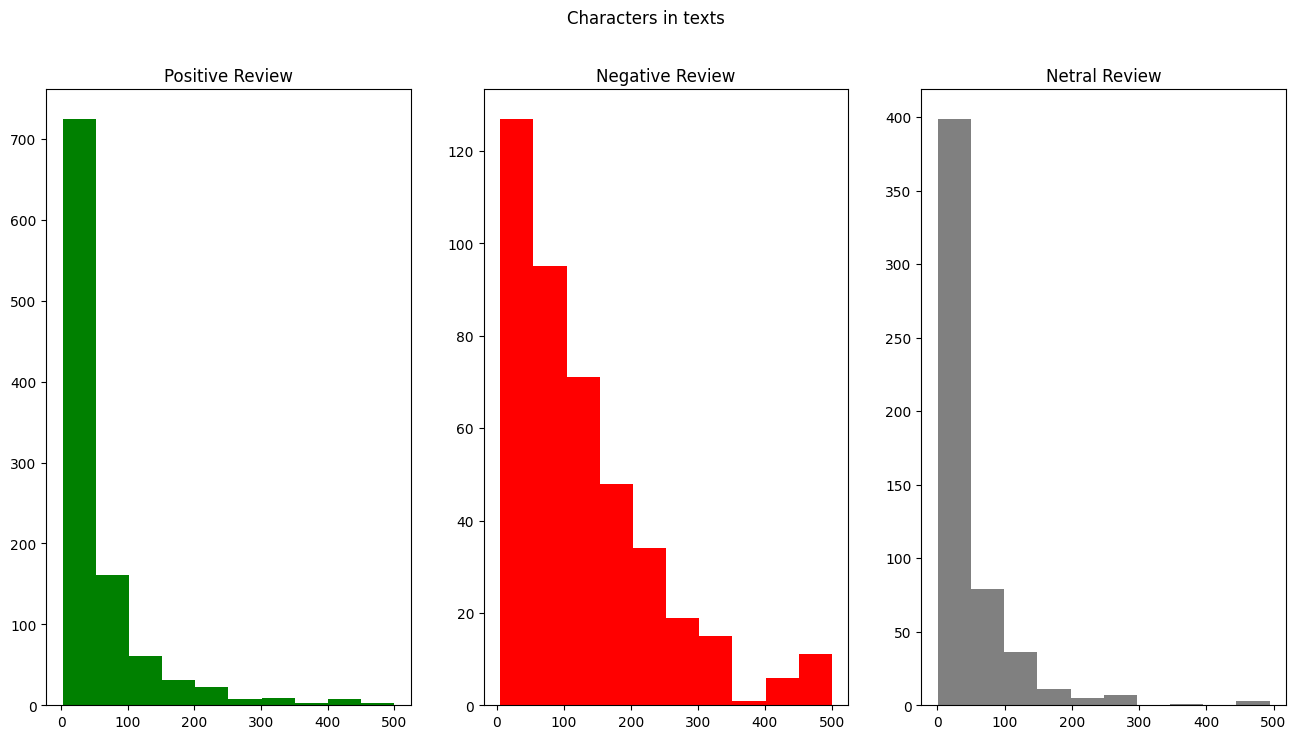

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,8))
text_len=df[df['sentiment']=="Positive"]['content'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Review')
text_len=df[df['sentiment']=="Negative"]['content'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Review')
text_len=df[df['sentiment']=="Neutral"]['content'].str.len()
ax3.hist(text_len,color='grey')
ax3.set_title('Netral Review')
fig.suptitle('Characters in texts')
plt.show()

Ketika seseorang memberikan review positif terdapat kecenderungan menggunakan lebih sedikit kata dibandingkan dengan review negatif ataupun netral. Hal ini bisa dimasukan dalam fitur engineering

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(tokenized_corpus, n, g):
    corpus = [' '.join(tokens) for tokens in tokenized_corpus]
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

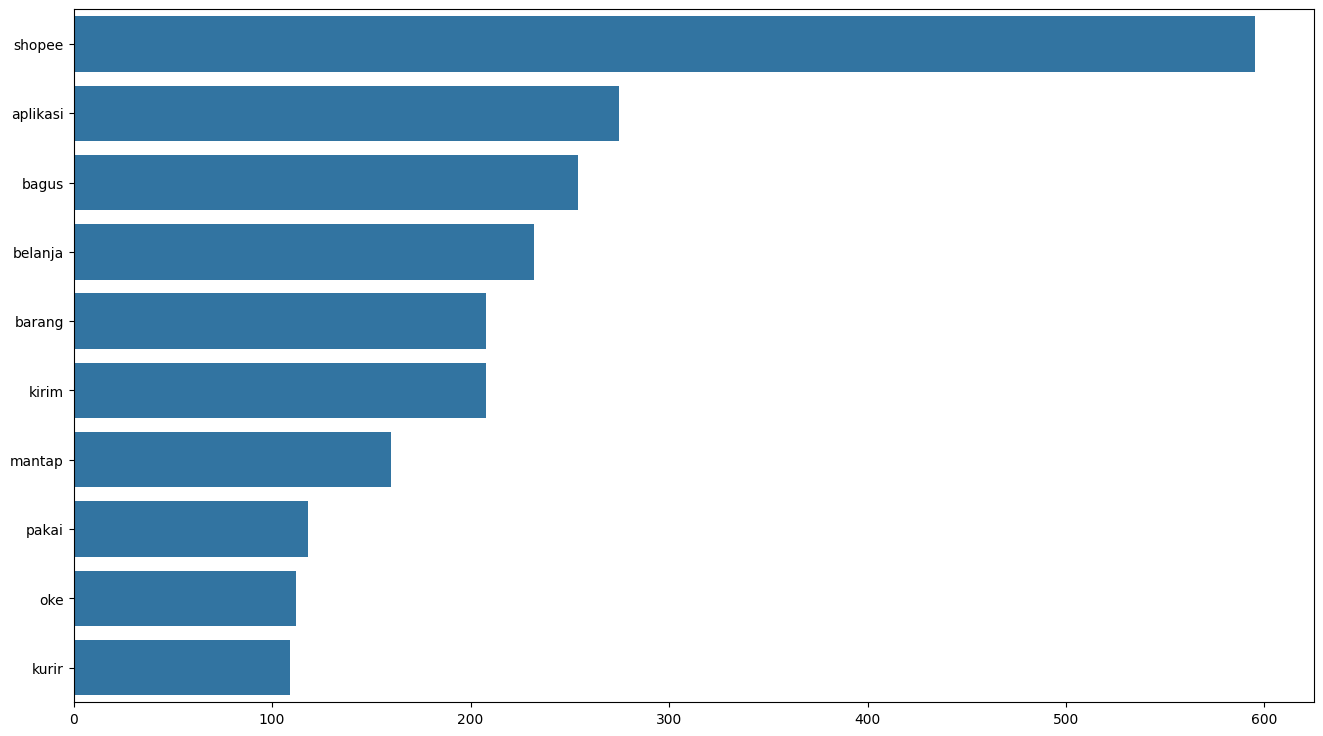

In [ ]:
# Unigram Analysis: Frekuensi kata yang sering muncul setelah di preprocessing
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.preprocessed,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<Axes: >

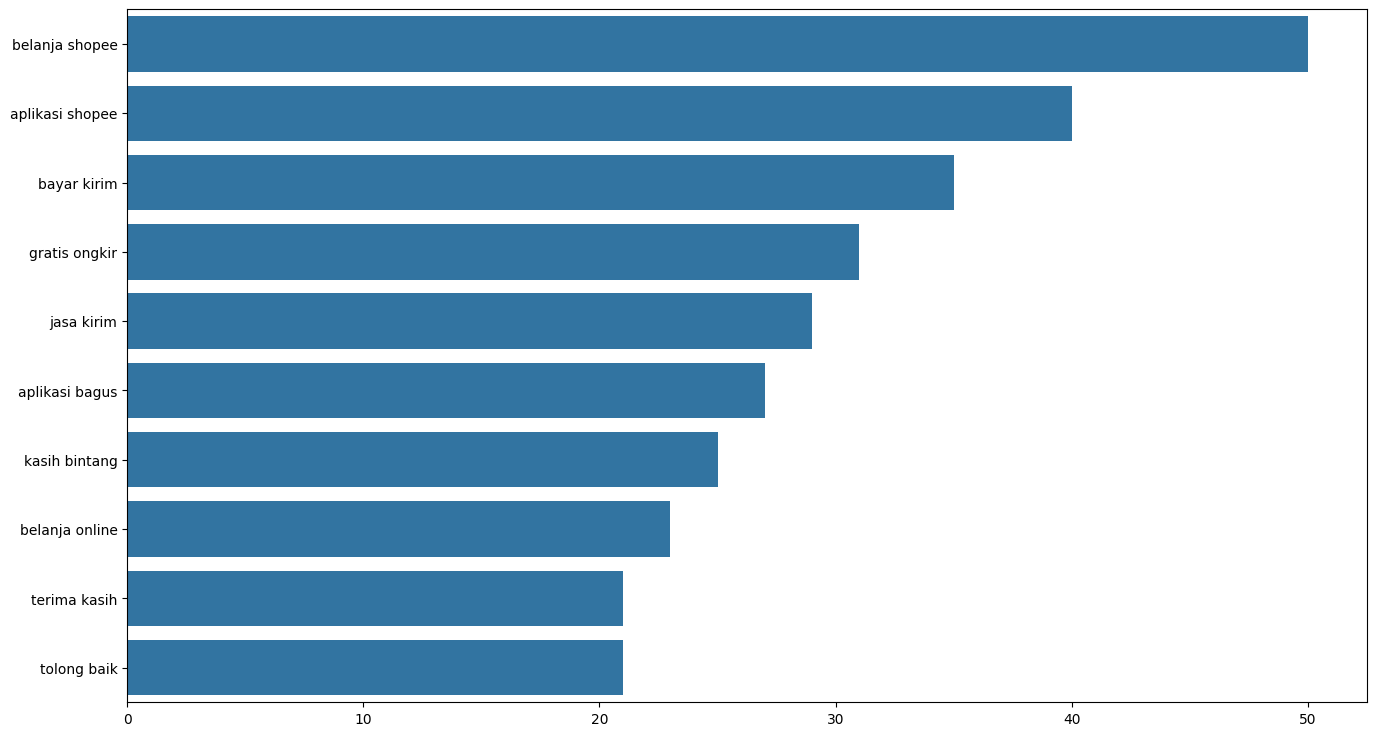

In [ ]:
# Unigram Analysis: Frekuensi dua kata berurut yang sering muncul setelah di preprocessing
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.preprocessed,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

## TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

df['preprocessed_str'] = df['preprocessed'].apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['preprocessed_str'])

normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)
X_normalized = X_normalized.toarray()

In [ ]:
# menambahkan fitur panjang komentar
df['comment_length'] = df['content'].apply(len)
X_normalized = np.hstack([X_normalized, df[['comment_length']]])

## Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
y=df['sentiment']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=42,stratify=y)

In [ ]:
gnb = MultinomialNB()
gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
print(f'classification_report training\n {classification_report(y_train, y_pred_train)}')

# Predict and evaluate
y_pred = gnb.predict(X_test)
print(f'classification_report testing\n {classification_report(y_test, y_pred)}')

classification_report training
               precision    recall  f1-score   support

    Negative       0.69      0.92      0.79       320
     Neutral       1.00      0.37      0.54       406
    Positive       0.77      0.92      0.84       774

    accuracy                           0.77      1500
   macro avg       0.82      0.74      0.72      1500
weighted avg       0.81      0.77      0.75      1500

classification_report testing
               precision    recall  f1-score   support

    Negative       0.56      0.83      0.67       107
     Neutral       0.94      0.12      0.21       135
    Positive       0.67      0.84      0.75       258

    accuracy                           0.65       500
   macro avg       0.72      0.60      0.54       500
weighted avg       0.72      0.65      0.59       500



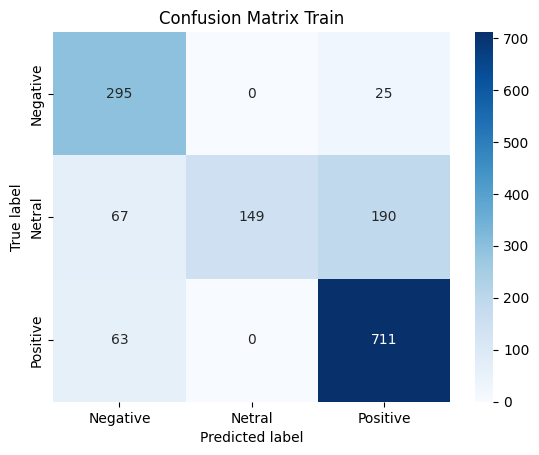

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_train = confusion_matrix(y_train, y_pred_train)

class_labels = ['Negative','Netral','Positive']
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Train')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

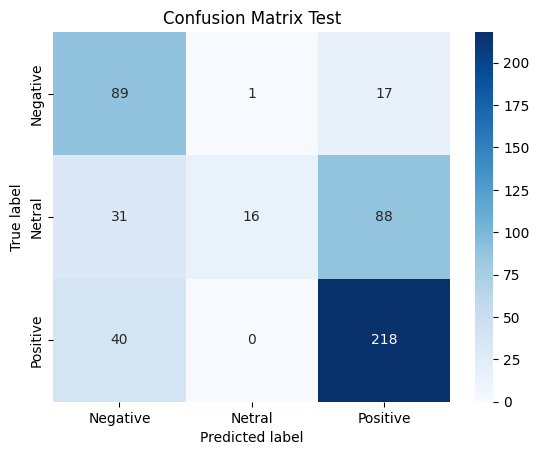

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_train = confusion_matrix(y_test, y_pred)

class_labels = ['Negative','Netral','Positive']
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Test')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Kesimpulan

Berdasarkan hasil classification_report untuk data pelatihan dan pengujian, dapat disimpulkan bahwa model menunjukkan performa yang baik dalam pelatihan tetapi mengalami penurunan signifikan dalam pengujian.

Pada data pelatihan, model memiliki akurasi sebesar 77% dengan f1-score tertinggi pada kategori "Positive" (0.84) dan "Negative" (0.79). Namun, kategori "Neutral" menunjukkan f1-score yang relatif rendah (0.54), meskipun precision-nya sempurna (1.00). Ini menunjukkan bahwa model cenderung baik dalam mengklasifikasikan kategori lain, tetapi kesulitan dalam membedakan kategori "Neutral".

Sebaliknya, pada data pengujian, akurasi menurun menjadi 65%, dengan f1-score tertinggi masih pada kategori "Positive" (0.75). Namun, kategori "Neutral" mengalami penurunan signifikan dalam recall (0.12) dan f1-score (0.21), yang menunjukkan bahwa model mengalami kesulitan yang lebih besar dalam menangani kategori ini pada data yang tidak dikenal sebelumnya.

Secara keseluruhan, meskipun model menunjukkan hasil yang cukup baik pada data pelatihan, performanya pada data pengujian menunjukkan adanya masalah overfitting dan kesulitan menangkap pola kategori "neutral".